In [1]:
from torchvision.transforms import *

from PIL import Image
import random
import math
import numpy as np
import torch

In [2]:
probability = 0.5
mean=[0.4914, 0.4822, 0.4465]
sl = 0.02
sh = 0.4
r1 = 0.3
    
def erase(img):

    if random.uniform(0, 1) > probability:
        return img

    for attempt in range(100):
        area = img.size()[1] * img.size()[2]
    
        target_area = random.uniform(sl, sh) * area
        aspect_ratio = random.uniform(r1, 1/r1)

        h = int(round(math.sqrt(target_area * aspect_ratio)))
        w = int(round(math.sqrt(target_area / aspect_ratio)))

        if w < img.size()[2] and h < img.size()[1]:
            x1 = random.randint(0, img.size()[1] - h)
            y1 = random.randint(0, img.size()[2] - w)
            if img.size()[0] == 3:
                img[0, x1:x1+h, y1:y1+w] = mean[0]
                img[1, x1:x1+h, y1:y1+w] = mean[1]
                img[2, x1:x1+h, y1:y1+w] = mean[2]
            else:
                img[0, x1:x1+h, y1:y1+w] = mean[0]
            return img

    return img


In [89]:
import cv2

img_path='./syn_00000.png'
img = cv2.imread(img_path)
img=torch.Tensor(img)
img=img.permute(2,0,1)
img.size()

torch.Size([3, 1040, 1920])

In [96]:
e_img=erase(img)
e_img.size()

torch.Size([3, 1040, 1920])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


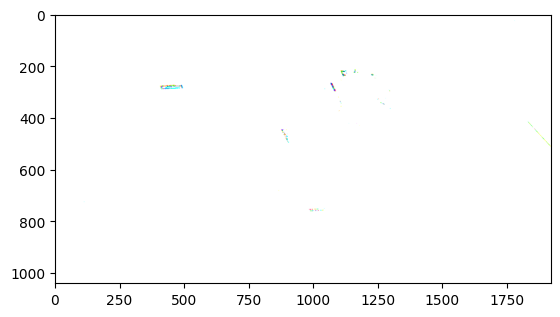

In [60]:
import matplotlib.pyplot as plt
plt.imshow(e_img.permute(1, 2, 0))

plt.show()

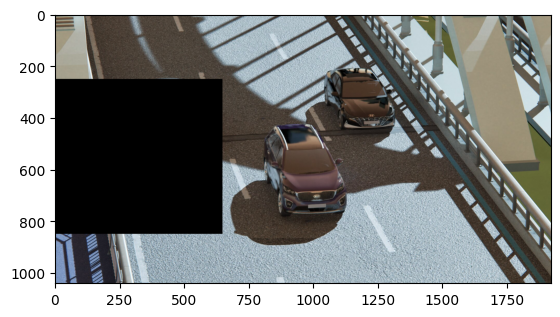

In [97]:
e_img2=e_img.permute(1, 2, 0)
plt.imshow(e_img2/255.0)
plt.show()